<a href="https://colab.research.google.com/github/riyagpt0251/Asphalt-MIx-Design-Using-PLR/blob/main/AsphaltMixDesignUsingPLR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import the necessary libraries

In [56]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt



Load the dataset

In [57]:
url = 'INFOMATERIALS_DATA_2025-1-24_000465.xlsx'  # Replace with your actual dataset URL
df = pd.read_excel(url)

Define input feature and target variable

In [58]:
X = df[['NMAS_mm', 'PG_Low', 'RAP_Percent', 'Gyrations', 'Target_Air_Voids_Percent', 'RBR_Percent']]  # Input features
y = df['Bulk_Target_Weight']

Handle missing value in x and y

In [59]:
imputer_X = SimpleImputer(strategy='mean')  # Impute missing values in X with mean
X_imputed = imputer_X.fit_transform(X)
imputer_y = SimpleImputer(strategy='mean')  # Impute missing values in y with mean
y_imputed = imputer_y.fit_transform(y.values.reshape(-1, 1)).ravel()

varify no nan value remain

In [60]:
print(f"Number of NaN values in X_imputed: {np.sum(np.isnan(X_imputed))}")
print(f"Number of NaN values in y_imputed: {np.sum(np.isnan(y_imputed))}")

Number of NaN values in X_imputed: 0
Number of NaN values in y_imputed: 0


split the data into training set and test set

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y_imputed, test_size=0.3, random_state=42)


Apply polynomial feature

In [62]:
poly = PolynomialFeatures(degree=2)  # You can adjust the degree
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

Train the linear regression model

In [63]:
model = LinearRegression()
model.fit(X_poly_train, y_train)

LinearRegression()

predict using the test set

In [64]:
y_pred = model.predict(X_poly_test)

In [ ]:
evaluate the model

In [65]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 16263542.435842892
R-squared: -4.962396591319853


visualize actual vs predicted valu

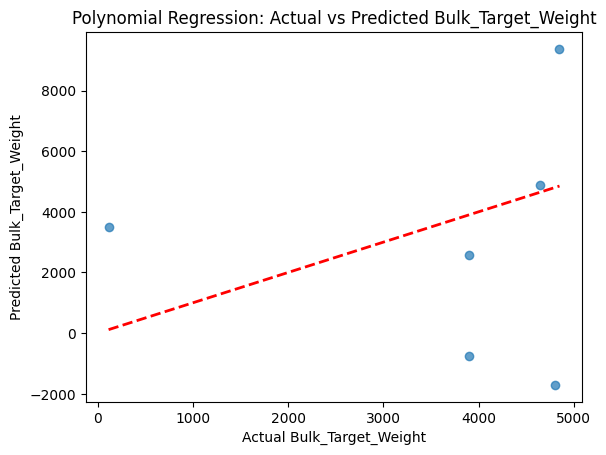

In [67]:
plt.scatter(y_test, y_pred, label='Predicted vs Actual', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2, label='Perfect Prediction Line')
plt.xlabel('Actual Bulk_Target_Weight')
plt.ylabel('Predicted Bulk_Target_Weight')
plt.title('Polynomial Regression: Actual vs Predicted Bulk_Target_Weight')
plt.show()